## INSTALACIÓN DE PAQUETES

#### Instalación del paquete para poder realizar la técnica de smote ya que no viene instalada. 

In [1]:
pip install imbalanced-learn

#### Instalación del paquete para poder realizar la gráfica del árbol de decisión ya que no viene instalada. 

In [2]:
pip install graphviz

#### Importar las librerías con las que voy a trabajar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

## LECTURA DE FICHEROS

In [4]:
#Leer el fichero y ver los datos (Marketing Analytics) para saber con que datos voy a trabajar. A comparación con la otra
#base de datos (todas parten de los mismos datos pero una selecciona unas variables y otra otras) esta tiene menos variables
#pero tiene la de country.
datos = pd.read_csv("E:\\Master\\TFM\\marketing_data.csv", sep=",")
datos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [5]:
#Para conocer las columnas que hay en total en el conjunto de datos
nombres_columnas = datos.columns
print(nombres_columnas)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [6]:
#Para saber el tipo de dato con el que se va a trabajar
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
#estos datos(marketing campaign) tienen dos columnas que la otra base de datos no tiene, le falta la columna country. 
datos1= pd.read_csv("E:\\Master\\TFM\\marketing_campaign.csv", sep="\t")
datos1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
#Para comprobar el tipo de dato
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## TRATAMIENTO DE LA BASE DE DATOS

#### UNIFICACIÓN DE AMBAS BASES

In [9]:
# Antes de tratar los datos, se ha realizado una unificación de bases para que la que se va a utilziar tenga todas las columnas
# Combinación de las bases de datos en función de la columna ID, que es la clave primaria qu los une y se ha añadido al final
combinacion= pd.merge(datos1, datos[['ID', 'Country']], on='ID', how='left')

# Se copia la columna Country de la base de datos original a la nueva base de datos
datos1['Country'] = combinacion['Country']

# Guardado de la nueva base de datos en un archivo CSV
datos1.to_csv('nueva.csv', index=False)

In [10]:
# Para comprobar que todo se ha guardado correctamente y que están bien los datos que se van a utilizar
combinacion

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Country
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,US
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,US
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,US
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,US
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,SA
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,SA
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,SA
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,SA


In [11]:
#Visualizar la base de datos combinada con la cual vamos a trabajar
datos2= pd.read_csv("E:\\Master\\TFM\\nueva.csv", sep=",")
datos2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Country
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,US
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,US
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,US
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,US
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,SA
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,SA
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,SA
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,SA


In [12]:
#Para saber la cantidad de datos y variables que tiene la base de datos
datos2.shape

(2240, 30)

In [13]:
# Comprobación de nuevo de las columnas para saber que se ha unificado bien
nombres_columnas = datos2.columns
print(nombres_columnas)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Country'],
      dtype='object')


In [14]:
datos2.info()
#Son todos números enteros menos los ingresos que son numeros decimales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### LIMPIEZA ESTADO CIVIL

In [15]:
#Cambio de los nombres de las variables del inglés al español, ya que toda la investigación va a ser en español
varespañol={'ID': 'Identificador', 'Year_Birth': 'Cumpleaños', 'Education': 'Educacion', 'Marital_Status':'Estadocivil', 'Income': 'Ingresos', 'Kidhome':'Niños',
       'Teenhome': 'Adolescentes', 'Dt_Customer': 'Inscripcion', 'Recency':'Ultimacompra', 'MntWines': 'Totalvinos', 'MntFruits': 'Totalfrutas',
       'MntMeatProducts': 'Totalcarnes', 'MntFishProducts':'Totalpescados', 'MntSweetProducts':'Totaldulces',
       'MntGoldProds':'Totallujos', 'NumDealsPurchases':'Comprasdescuentos', 'NumWebPurchases':'Comprasweb',
       'NumCatalogPurchases':'Comprascatalogo', 'NumStorePurchases':'Comprastiendas', 'NumWebVisitsMonth':'Visitaswebmes',
       'AcceptedCmp3':'Campaña3', 'AcceptedCmp4':'Campaña4', 'AcceptedCmp5':'Campaña5', 'AcceptedCmp1':'Campaña1',
       'AcceptedCmp2':'Campaña2', 'Complain':'Quejas', 'Z_CostContact':'Zcostecontacto', 'Z_Revenue':'Zingresos', 'Response':'Respuesta',
       'Country':'Pais'}
datos2= datos2.rename(columns=varespañol)

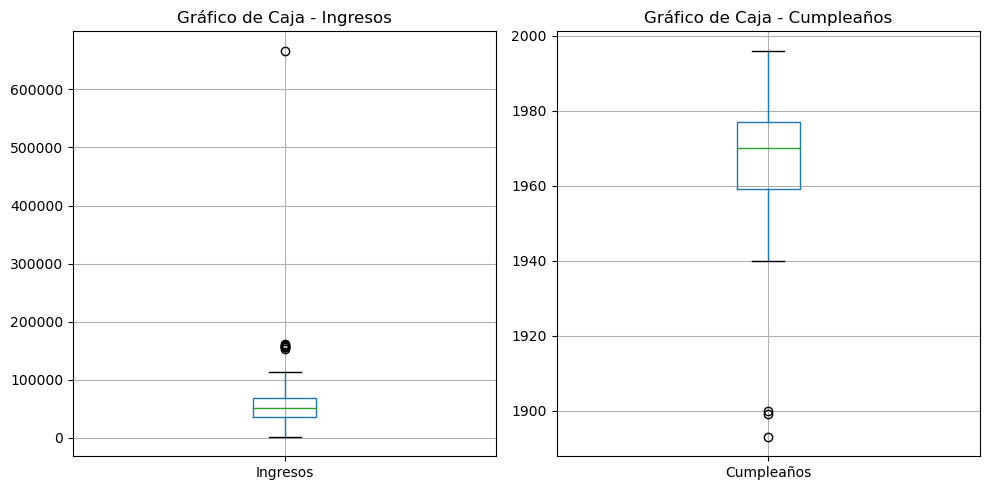

In [16]:
# Crear los gráficos de caja
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

datos2.boxplot(column='Ingresos', ax=axes[0])
axes[0].set_title('Gráfico de Caja - Ingresos')

datos2.boxplot(column='Cumpleaños', ax=axes[1])
axes[1].set_title('Gráfico de Caja - Cumpleaños')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [17]:
#Para ver si se han cambiado bien las variables
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Identificador      2240 non-null   int64  
 1   Cumpleaños         2240 non-null   int64  
 2   Educacion          2240 non-null   object 
 3   Estadocivil        2240 non-null   object 
 4   Ingresos           2216 non-null   float64
 5   Niños              2240 non-null   int64  
 6   Adolescentes       2240 non-null   int64  
 7   Inscripcion        2240 non-null   object 
 8   Ultimacompra       2240 non-null   int64  
 9   Totalvinos         2240 non-null   int64  
 10  Totalfrutas        2240 non-null   int64  
 11  Totalcarnes        2240 non-null   int64  
 12  Totalpescados      2240 non-null   int64  
 13  Totaldulces        2240 non-null   int64  
 14  Totallujos         2240 non-null   int64  
 15  Comprasdescuentos  2240 non-null   int64  
 16  Comprasweb         2240 

In [18]:
#Comprobación de las variables categóricas (Estado civil) para saber si las respuestas son correctas o hay algún error
#tengo que cambiar en la columna de estado civil el alone por single.
datos2.groupby("Estadocivil").describe().index


Index(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],
      dtype='object', name='Estadocivil')

In [19]:
#Cambio de respuestas que significan lo mismo para unificarlas en una
datos3= datos2.replace(['Absurd','Alone','YOLO'], 'Single')

In [20]:
#Para cambiar el nombre de las respuestas categóricas de inglés al español

datos3['Estadocivil'] = datos3['Estadocivil'].replace('Divorced', 'Divorciado')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Single', 'Soltero')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Married', 'Casado')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Widow', 'Viudo')
datos3['Estadocivil'] = datos3['Estadocivil'].replace('Together', 'Parejadehecho')

In [21]:
#Comprobación de que no queda ninguna instancia mal o en inglés
datos3.groupby("Estadocivil").describe().index

Index(['Casado', 'Divorciado', 'Parejadehecho', 'Soltero', 'Viudo'], dtype='object', name='Estadocivil')

In [22]:
# Comprobraciñon general de los datos
datos3

,Identificador,Cumpleaños,Educacion,Estadocivil,Ingresos,Niños,Adolescentes,Inscripcion,Ultimacompra,Totalvinos,...,Campaña3,Campaña4,Campaña5,Campaña1,Campaña2,Quejas,Zcostecontacto,Zingresos,Respuesta,Pais
0,5524,1957,Graduation,Soltero,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,US
1,2174,1954,Graduation,Soltero,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,US
2,4141,1965,Graduation,Parejadehecho,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,US
3,6182,1984,Graduation,Parejadehecho,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,US
4,5324,1981,PhD,Casado,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Casado,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,SA
2236,4001,1946,PhD,Parejadehecho,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,SA
2237,7270,1981,Graduation,Divorciado,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,SA
2238,8235,1956,Master,Parejadehecho,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,SA


#### LIMPIEZA EDUCACIÓN

In [23]:
# Comprobación de que los datos categóricos de la variable eduación son correctos
datos3.groupby("Educacion").describe().index

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object', name='Educacion')

In [24]:
# Se reemplaza el 2 ciclo por master ya que significan lo mismo
datos4= datos3.replace(['2n Cycle'], 'Master')

In [25]:
# Descripción de la variable educación para saber que se ha cambiado correctamente la instancia
datos4.groupby("Educacion").describe().index

Index(['Basic', 'Graduation', 'Master', 'PhD'], dtype='object', name='Educacion')

In [26]:
#Para cambiar el nombre de las respuestas categóricas de inglés al español

datos4['Educacion'] = datos4['Educacion'].replace('Basic', 'Basico')
datos4['Educacion'] = datos4['Educacion'].replace('Graduation', 'Graduado')

In [27]:
# Comprobación general de los datos para saber que están bien
datos4

,Identificador,Cumpleaños,Educacion,Estadocivil,Ingresos,Niños,Adolescentes,Inscripcion,Ultimacompra,Totalvinos,...,Campaña3,Campaña4,Campaña5,Campaña1,Campaña2,Quejas,Zcostecontacto,Zingresos,Respuesta,Pais
0,5524,1957,Graduado,Soltero,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,US
1,2174,1954,Graduado,Soltero,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,US
2,4141,1965,Graduado,Parejadehecho,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,US
3,6182,1984,Graduado,Parejadehecho,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,US
4,5324,1981,PhD,Casado,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduado,Casado,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,SA
2236,4001,1946,PhD,Parejadehecho,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,SA
2237,7270,1981,Graduado,Divorciado,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,SA
2238,8235,1956,Master,Parejadehecho,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,SA


#### LIMPIEZA DE NULOS

In [28]:
#para saber en qué columna hay valores nulos
datos4.isnull().any()

Identificador        False
Cumpleaños           False
Educacion            False
Estadocivil          False
Ingresos              True
Niños                False
Adolescentes         False
Inscripcion          False
Ultimacompra         False
Totalvinos           False
Totalfrutas          False
Totalcarnes          False
Totalpescados        False
Totaldulces          False
Totallujos           False
Comprasdescuentos    False
Comprasweb           False
Comprascatalogo      False
Comprastiendas       False
Visitaswebmes        False
Campaña3             False
Campaña4             False
Campaña5             False
Campaña1             False
Campaña2             False
Quejas               False
Zcostecontacto       False
Zingresos            False
Respuesta            False
Pais                 False
dtype: bool

In [29]:
#Para saber el número total de datos nulos que hay por columna
datos4.isnull().sum()

Identificador         0
Cumpleaños            0
Educacion             0
Estadocivil           0
Ingresos             24
Niños                 0
Adolescentes          0
Inscripcion           0
Ultimacompra          0
Totalvinos            0
Totalfrutas           0
Totalcarnes           0
Totalpescados         0
Totaldulces           0
Totallujos            0
Comprasdescuentos     0
Comprasweb            0
Comprascatalogo       0
Comprastiendas        0
Visitaswebmes         0
Campaña3              0
Campaña4              0
Campaña5              0
Campaña1              0
Campaña2              0
Quejas                0
Zcostecontacto        0
Zingresos             0
Respuesta             0
Pais                  0
dtype: int64

In [30]:
#Para saber la media de los valores de cada columna
datos4.mean(axis=0)

C:\Users\Lucia\AppData\Local\Temp\ipykernel_13148\2816139399.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datos4.mean(axis=0)


Identificador         5592.159821
Cumpleaños            1968.805804
Ingresos             52247.251354
Niños                    0.444196
Adolescentes             0.506250
Ultimacompra            49.109375
Totalvinos             303.935714
Totalfrutas             26.302232
Totalcarnes            166.950000
Totalpescados           37.525446
Totaldulces             27.062946
Totallujos              44.021875
Comprasdescuentos        2.325000
Comprasweb               4.084821
Comprascatalogo          2.662054
Comprastiendas           5.790179
Visitaswebmes            5.316518
Campaña3                 0.072768
Campaña4                 0.074554
Campaña5                 0.072768
Campaña1                 0.064286
Campaña2                 0.013393
Quejas                   0.009375
Zcostecontacto           3.000000
Zingresos               11.000000
Respuesta                0.149107
dtype: float64

In [31]:
#Para rellenar los datos nulos con la media de la columna ingresos.
media= datos4['Ingresos'].mean()
datos4['Ingresos'] = datos4['Ingresos'].fillna(media)

In [32]:
#Volvemos a comprobar que no hay ningún valor nulo.
datos4.isnull().sum()

Identificador        0
Cumpleaños           0
Educacion            0
Estadocivil          0
Ingresos             0
Niños                0
Adolescentes         0
Inscripcion          0
Ultimacompra         0
Totalvinos           0
Totalfrutas          0
Totalcarnes          0
Totalpescados        0
Totaldulces          0
Totallujos           0
Comprasdescuentos    0
Comprasweb           0
Comprascatalogo      0
Comprastiendas       0
Visitaswebmes        0
Campaña3             0
Campaña4             0
Campaña5             0
Campaña1             0
Campaña2             0
Quejas               0
Zcostecontacto       0
Zingresos            0
Respuesta            0
Pais                 0
dtype: int64

### COMPROBACIÓN DE ERRORES

In [33]:
#Para sacar los estadísticos
datos4.describe()

,Identificador,Cumpleaños,Ingresos,Niños,Adolescentes,Ultimacompra,Totalvinos,Totalfrutas,Totalcarnes,Totalpescados,...,Visitaswebmes,Campaña3,Campaña4,Campaña5,Campaña1,Campaña2,Quejas,Zcostecontacto,Zingresos,Respuesta
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### LIMPIEZA DE LA VARIABLE CUMPLEAÑOS

In [34]:
#Comprobar los valores unicos ya que se ha comprobado con el describe que hay un valor extraño
datos4['Cumpleaños'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)

In [35]:
#Como hay 3 valores en años que están mal ya que no sigue la media del resto, se intuye que o son anormales o se han introducido
#incorrectamente a la hora de rellenar los datos. Por ello, se van a reemplazar por la media de los datos en vez de eliminarlos.
datos4['Cumpleaños'] = datos4['Cumpleaños'].replace(1893, 1969)
datos4['Cumpleaños'] = datos4['Cumpleaños'].replace(1900, 1969)
datos4['Cumpleaños'] = datos4['Cumpleaños'].replace(1899, 1969)

In [36]:
#Comprobar que los datos se han limpiado correctamente
datos4['Cumpleaños'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1990, 1947, 1993, 1994, 1941, 1944, 1995,
       1940], dtype=int64)

#### LIMPIEZA DE LA VARIABLE INGRESOS

In [37]:
#Para ver cual es el mayor dato que se habia comprobado previamente con el describe
datos4['Ingresos'].max()

666666.0

In [38]:
#Como hay un valor en los ingresos que no sigue la media de los demas: un ingreso de 666.666€, se intuye que es anormal o que
#se ha introducido incorrectamente a la hora de rellenar los datos. Por ello, se va a reemplazar por la media de los datos
#en vez de eliminarlo
datos4['Ingresos']= datos4['Ingresos'].replace(666666.0, 52247.251354)

In [39]:
#comprobar que se ha limpiado bien observando el numero máximo
datos4['Ingresos'].max()

162397.0

In [40]:
#Comprobar que no hay más datos erróneos
datos4['Ingresos'].unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

## GUARDADO DE ARCHIVOS

In [41]:
#Guardado del csv de la base de datos tratada y con la cual se va a trabajar
datos4.to_csv('ARCHIVOTRATADO.csv', sep=';')

In [42]:
#Guardado de la base de datos sin tratar por si más adelante se necesita
datos.to_csv('ARCHIVO2.csv', sep=';')

## ANÁLISIS ESTADÍSTICO VARIABLES CUANTITATIVAS

In [43]:
#Descripción estadistica traspuesta para pasar al documento
datos4.describe().T

,count,mean,std,min,25%,50%,75%,max
Identificador,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Cumpleaños,2240.0,1968.901786,11.694076,1940.0,1959.00,1970.0,1977.00,1996.0
Ingresos,2240.0,51972.957270,21405.824379,1730.0,35538.75,51741.5,68275.75,162397.0
Niños,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Adolescentes,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Ultimacompra,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
Totalvinos,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
Totalfrutas,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
Totalcarnes,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
Totalpescados,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


#### COMPROBACIÓN DE INGRESOS

In [44]:
#Como se ha limpiado antes esta variable, se ordena de mayor a menor para acabar de comprobar
datos4.sort_values(by=['Ingresos'], ascending=False)

,Identificador,Cumpleaños,Educacion,Estadocivil,Ingresos,Niños,Adolescentes,Inscripcion,Ultimacompra,Totalvinos,...,Campaña3,Campaña4,Campaña5,Campaña1,Campaña2,Quejas,Zcostecontacto,Zingresos,Respuesta,Pais
617,1503,1976,PhD,Parejadehecho,162397.0,1,1,03-06-2013,31,85,...,0,0,0,0,0,0,3,11,0,SP
687,1501,1982,PhD,Casado,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,3,11,0,US
1300,5336,1971,Master,Parejadehecho,157733.0,1,0,04-06-2013,37,39,...,0,0,0,0,0,0,3,11,0,SP
164,8475,1973,PhD,Casado,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,3,11,0,IND
1653,4931,1977,Graduado,Parejadehecho,157146.0,0,0,29-04-2013,13,1,...,0,0,0,0,0,0,3,11,0,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,10311,1969,Graduado,Casado,4428.0,0,1,05-10-2013,0,16,...,0,0,0,0,0,0,3,11,0,SP
1846,9931,1963,PhD,Casado,4023.0,1,1,23-06-2014,29,5,...,0,0,0,0,0,0,3,11,0,SP
1524,11110,1973,Graduado,Soltero,3502.0,1,0,13-04-2013,56,2,...,0,0,0,0,0,0,3,11,0,IND
21,5376,1979,Graduado,Casado,2447.0,1,0,06-01-2013,42,1,...,0,0,0,0,0,0,3,11,0,US


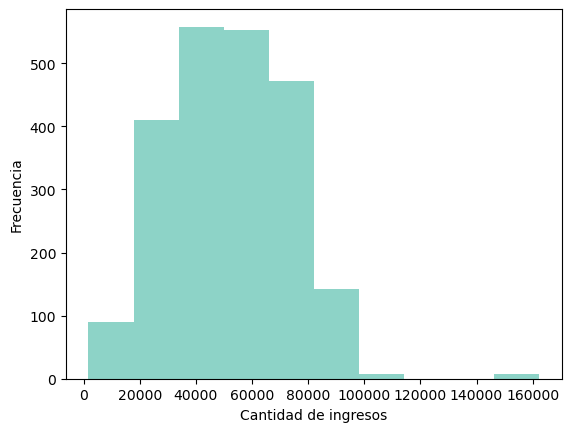

In [45]:
#Histograma de la variable ingresos
datos4['Ingresos'].plot(kind='hist', cmap='Set3')
plt.xlabel('Cantidad de ingresos')
plt.ylabel('Frecuencia')
plt.show()

#### CONVERSION DE DT CUSTOMER(INSCRIPCION) PARA SACAR EL AÑO DE LOS CLIENTES

In [46]:
import warnings

# Filtrar las advertencias para que el código no quede con 30 páginas de mensaje
warnings.filterwarnings("ignore", category=UserWarning, message="Parsing .* in DD/MM/YYYY format.*")

#Convertir la variable inscripción que es tipo objeto a fecha para poder manipularla luego
datos4['Inscripcion'] = pd.to_datetime(datos4['Inscripcion'])

# Para que vuelvan a saltar
warnings.resetwarnings()

In [47]:
#Comprobración de que se ha transformado bien la variable a datetime
datos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Identificador      2240 non-null   int64         
 1   Cumpleaños         2240 non-null   int64         
 2   Educacion          2240 non-null   object        
 3   Estadocivil        2240 non-null   object        
 4   Ingresos           2240 non-null   float64       
 5   Niños              2240 non-null   int64         
 6   Adolescentes       2240 non-null   int64         
 7   Inscripcion        2240 non-null   datetime64[ns]
 8   Ultimacompra       2240 non-null   int64         
 9   Totalvinos         2240 non-null   int64         
 10  Totalfrutas        2240 non-null   int64         
 11  Totalcarnes        2240 non-null   int64         
 12  Totalpescados      2240 non-null   int64         
 13  Totaldulces        2240 non-null   int64         
 14  Totalluj

In [48]:
# Comprobación de todos los datos en formato tabla
datos4

,Identificador,Cumpleaños,Educacion,Estadocivil,Ingresos,Niños,Adolescentes,Inscripcion,Ultimacompra,Totalvinos,...,Campaña3,Campaña4,Campaña5,Campaña1,Campaña2,Quejas,Zcostecontacto,Zingresos,Respuesta,Pais
0,5524,1957,Graduado,Soltero,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,US
1,2174,1954,Graduado,Soltero,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,US
2,4141,1965,Graduado,Parejadehecho,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,US
3,6182,1984,Graduado,Parejadehecho,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,US
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduado,Casado,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,SA
2236,4001,1946,PhD,Parejadehecho,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,SA
2237,7270,1981,Graduado,Divorciado,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,SA
2238,8235,1956,Master,Parejadehecho,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,SA


In [49]:
#Como no interesa tratar los datos con el año de nacimiento se crea una columna que sean los años
datos4["añocompra"] = datos4["Inscripcion"].dt.year
datos4["añocompra"]
datos4["años"]= datos4["añocompra"] - datos4['Cumpleaños']
datos4["años"]

0       55
1       60
2       48
3       30
4       33
        ..
2235    46
2236    68
2237    33
2238    58
2239    58
Name: años, Length: 2240, dtype: int64

In [50]:
#Comprobación de que se ha creado la columna correspondiente
datos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Identificador      2240 non-null   int64         
 1   Cumpleaños         2240 non-null   int64         
 2   Educacion          2240 non-null   object        
 3   Estadocivil        2240 non-null   object        
 4   Ingresos           2240 non-null   float64       
 5   Niños              2240 non-null   int64         
 6   Adolescentes       2240 non-null   int64         
 7   Inscripcion        2240 non-null   datetime64[ns]
 8   Ultimacompra       2240 non-null   int64         
 9   Totalvinos         2240 non-null   int64         
 10  Totalfrutas        2240 non-null   int64         
 11  Totalcarnes        2240 non-null   int64         
 12  Totalpescados      2240 non-null   int64         
 13  Totaldulces        2240 non-null   int64         
 14  Totalluj

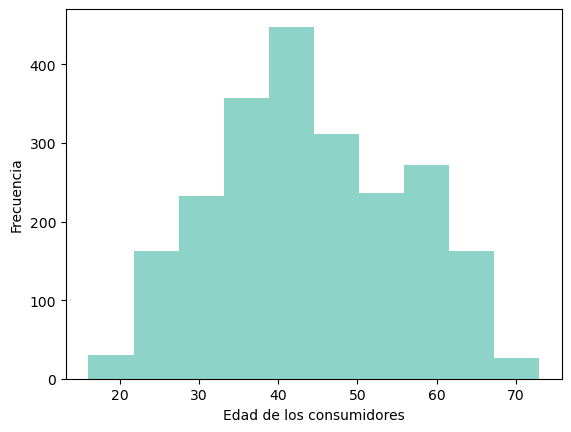

In [51]:
#Histograma para ver la edad de los consumidores
datos4['años'].plot(kind='hist', cmap='Set3')
plt.xlabel('Edad de los consumidores')
plt.ylabel('Frecuencia')
plt.show()

In [52]:
#Datos estadísticos con la edad de los consumidores y no el año de nacimiento
datos4['años'].describe()

count    2240.000000
mean       44.126339
std        11.731156
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: años, dtype: float64

#### ANALIZAR EL TOTAL DE GASTO DE LOS CLIENTES

In [53]:
#Creación de una variable con el total del gasto de los distintos productos
datos4['Totalgasto']= datos4.loc[:, ['Totalvinos', 'Totalfrutas',
      'Totalcarnes', 'Totalpescados', 'Totaldulces',
       'Totallujos']].sum(axis=1)
datos4['Totalgasto']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Totalgasto, Length: 2240, dtype: int64

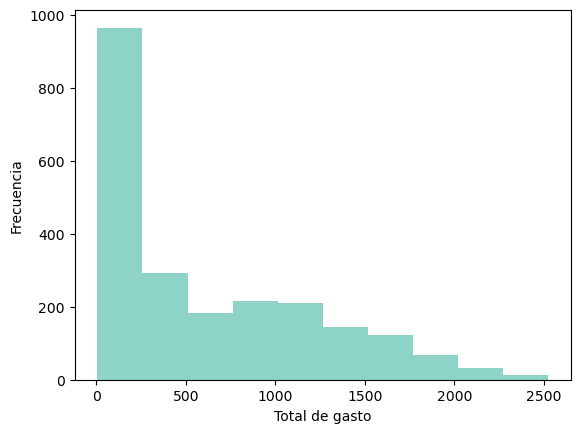

In [54]:
#Histograma del total de gasto
datos4['Totalgasto'].plot(kind='hist', cmap='Set3')
plt.xlabel('Total de gasto')
plt.ylabel('Frecuencia')
plt.show()

#### ANALIZAR EL NUMERO TOTAL DE HIJOS

Text(0, 0.5, 'Frecuencia ')

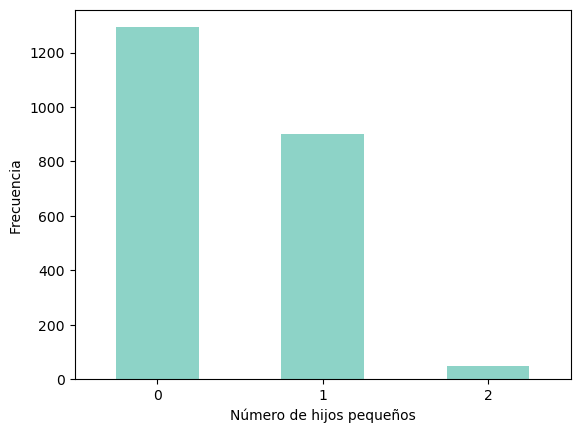

In [55]:
# Gráfico de barras de los niños que hay en cada familia de los consumidores
datos4['Niños'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Número de hijos pequeños')
plt.ylabel('Frecuencia ')

Text(0, 0.5, 'Frecuencia')

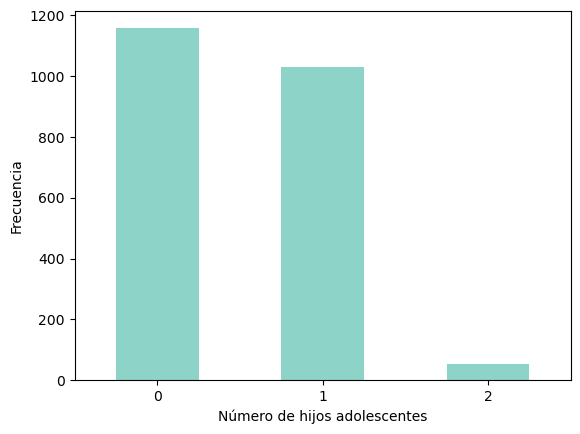

In [56]:
# Gráfica de barra de los adolescentes que hay en cada familia de los consumidores
datos4['Adolescentes'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Número de hijos adolescentes')
plt.ylabel('Frecuencia')

In [57]:
# Creación de una nueva variable del total de hijos que tienen los consumidores
datos4['Totalhijos']= datos4.loc[:, ['Niños', 'Adolescentes']].sum(axis=1)
datos4['Totalhijos']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Totalhijos, Length: 2240, dtype: int64

Text(0, 0.5, 'Total de número de hijos')

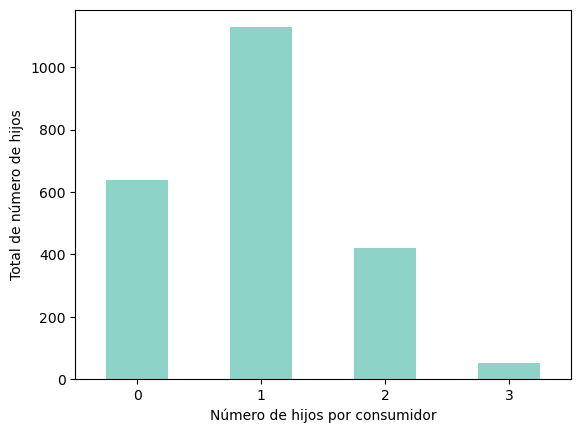

In [58]:
# Representación gráfica de los hijos totales que hay en la familia de los consumidores
datos4['Totalhijos'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Número de hijos por consumidor')
plt.ylabel('Total de número de hijos')

##### ANÁLISIS INDIVIDUAL DE COMPRA

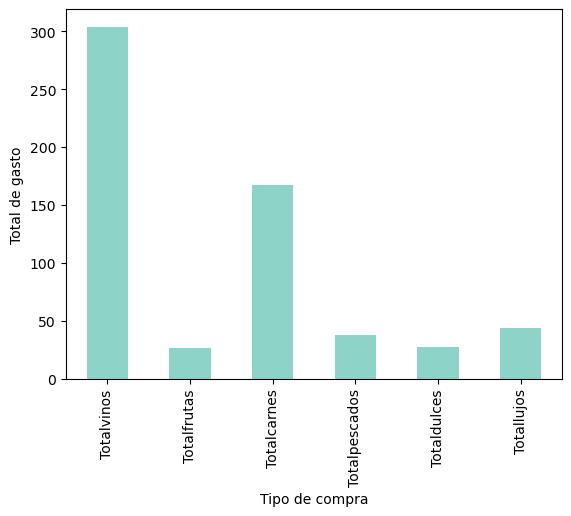

In [59]:
# Representación del gasto medio de cada tipo de compra
columnas_loc = datos4.loc[:, ['Totalvinos', 'Totalfrutas',
       'Totalcarnes', 'Totalpescados', 'Totaldulces',
       'Totallujos']]
medias = columnas_loc.mean()
medias.plot.bar( cmap='Set3')
plt.xlabel('Tipo de compra')
plt.ylabel('Total de gasto')
plt.show()

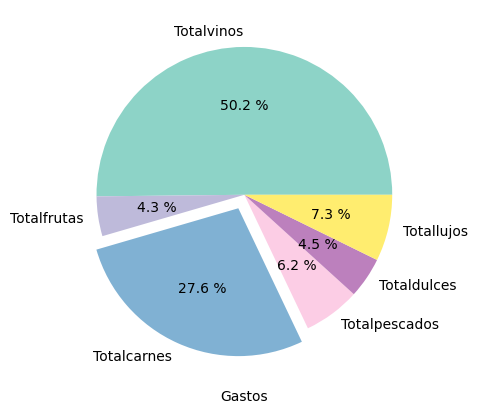

In [60]:
# Igual que el anterior pero en porcentaje y en gráfico circular
columnas_loc = datos4.loc[:, ['Totalvinos', 'Totalfrutas',
       'Totalcarnes', 'Totalpescados', 'Totaldulces',
       'Totallujos']]
medias = columnas_loc.mean()
desfase=(0,0,0.1,0,0,0)
medias.plot.pie( cmap='Set3',  autopct="%0.1f %%", explode=desfase)
plt.xlabel('Gastos')
plt.ylabel('    ')
plt.show()

In [61]:
# ordenado descendente
educacion=datos4.groupby(['años'])['Totallujos'].mean()
educacion.sort_values(ascending=False)

años
20    86.000000
22    80.923077
19    74.250000
68    67.333333
62    65.440000
61    60.083333
29    58.095238
51    56.977778
52    56.422222
66    56.380952
59    53.829268
50    52.586957
67    51.666667
57    51.000000
16    50.000000
21    49.846154
56    49.681818
17    49.500000
55    48.372881
44    47.323944
27    47.302326
45    47.245283
23    47.000000
58    46.843137
25    44.962963
60    44.854167
47    44.480000
48    44.163934
64    44.031250
34    42.280702
38    42.000000
49    41.692308
35    41.447761
46    41.285714
31    41.177778
54    40.882353
42    40.730337
41    40.197802
37    39.780488
63    39.533333
32    39.340909
30    39.260000
43    39.253521
24    39.166667
36    38.984127
70    38.333333
28    38.114286
65    34.111111
33    33.736842
40    33.275362
53    30.222222
39    29.140351
18    28.666667
26    26.117647
72    21.000000
69    17.833333
71    12.000000
73     6.000000
Name: Totallujos, dtype: float64

In [62]:
vinos=datos4.groupby(['Educacion'])['Totallujos'].apply(lambda x: x.mode())
vinos.sort_values(ascending=False)

Educacion   
Basico     0    15
Master     0     3
Graduado   0     1
PhD        0     0
Name: Totallujos, dtype: int64

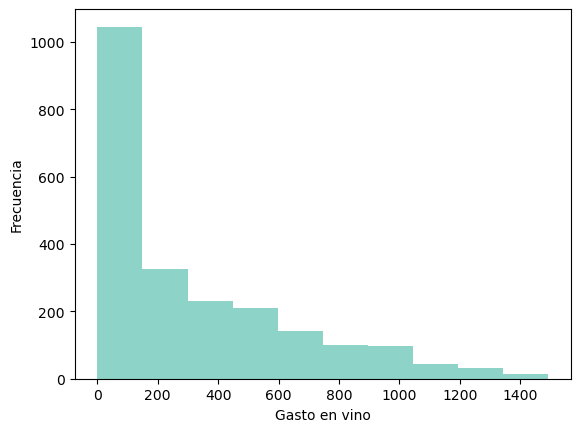

In [63]:
# Representación del gasto en vino de los consumidores 
datos4['Totalvinos'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en vino')
plt.ylabel('Frecuencia')
plt.show()

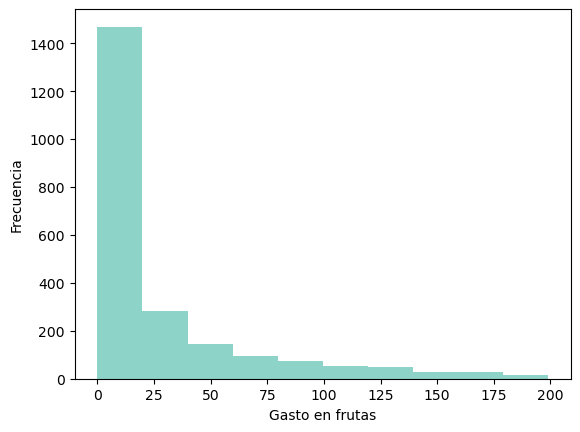

In [64]:
# Representación del gasto en fruta de los consumidores 
datos4['Totalfrutas'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en frutas')
plt.ylabel('Frecuencia')
plt.show()

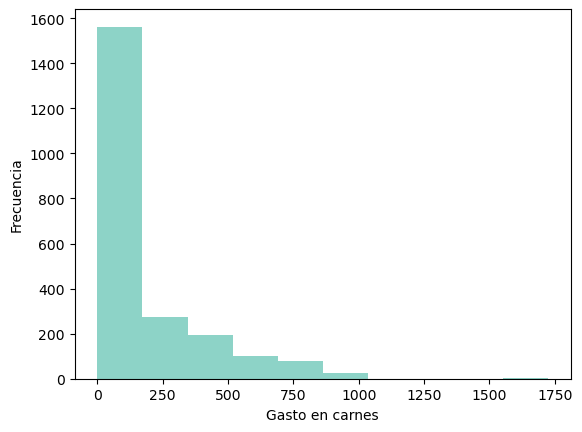

In [65]:
# Representación del gasto en carne de los consumidores 
datos4['Totalcarnes'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en carnes')
plt.ylabel('Frecuencia')
plt.show()

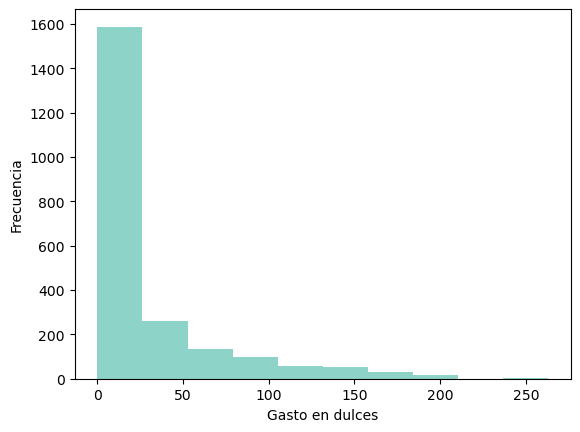

In [66]:
# Representación del gasto en dulces de los consumidores 
datos4['Totaldulces'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en dulces')
plt.ylabel('Frecuencia')
plt.show()

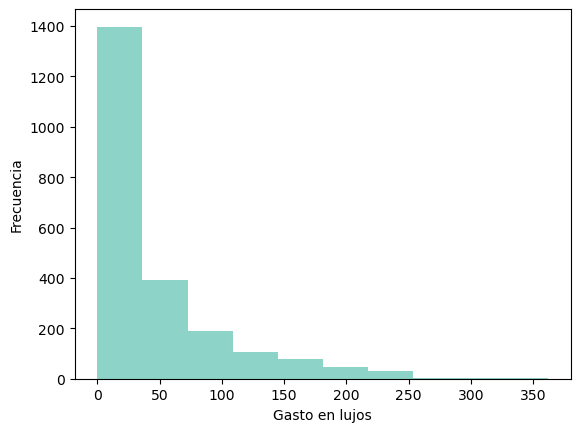

In [67]:
# Representación del gasto en lujos de los consumidores 
datos4['Totallujos'].plot(kind='hist', cmap='Set3')
plt.xlabel('Gasto en lujos')
plt.ylabel('Frecuencia')
plt.show()

#### Análisis de la aceptación de las campañas

Text(0, 0.5, 'Frecuencia')

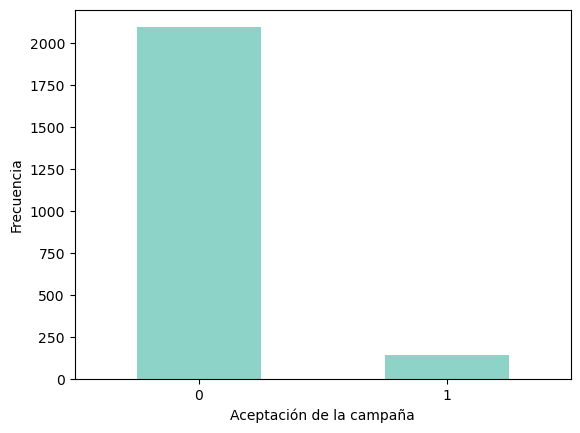

In [68]:
# Representación de aceptación de la campaña 1 
datos4['Campaña1'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

<AxesSubplot:ylabel='Campaña1'>

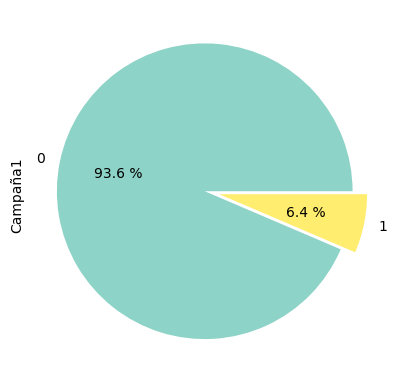

In [69]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña1'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

Text(0, 0.5, 'Frecuencia')

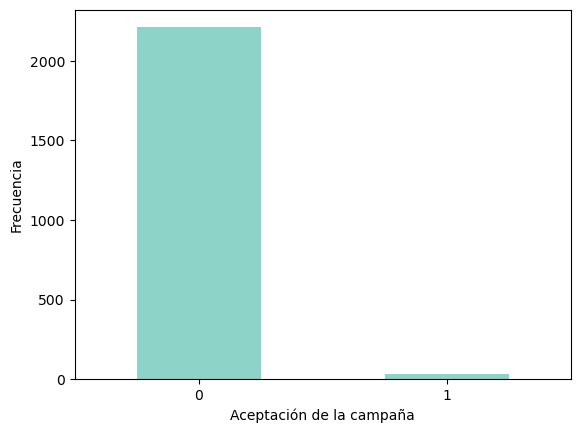

In [70]:
# Representación de aceptación de la campaña 2 
datos4['Campaña2'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

<AxesSubplot:ylabel='Campaña2'>

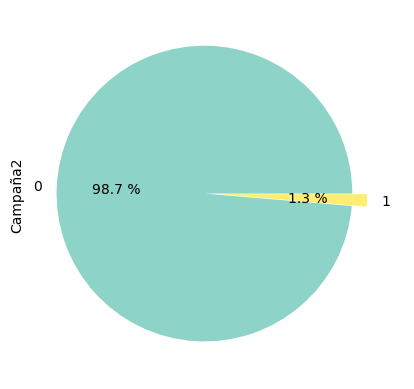

In [71]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña2'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

Text(0, 0.5, 'Frecuencia')

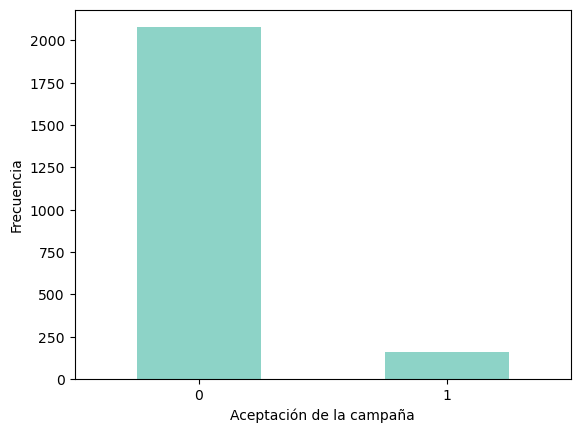

In [72]:
# Representación de aceptación de la campaña 3 
datos4['Campaña3'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

<AxesSubplot:ylabel='Campaña3'>

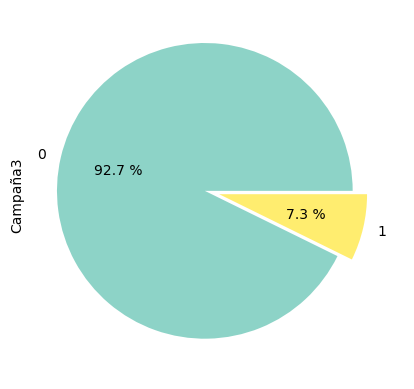

In [73]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña3'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

Text(0, 0.5, 'Frecuencia')

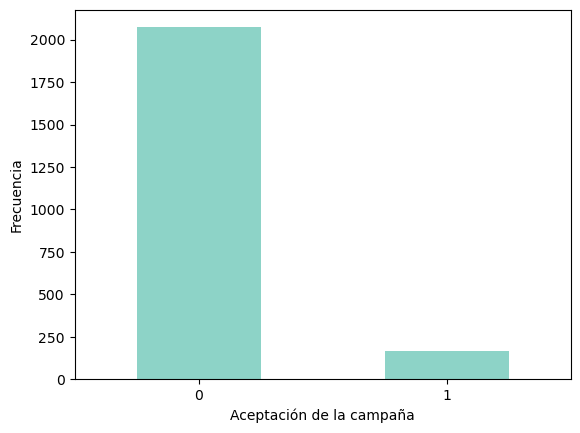

In [74]:
# Representación de aceptación de la campaña 4
datos4['Campaña4'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

<AxesSubplot:ylabel='Campaña4'>

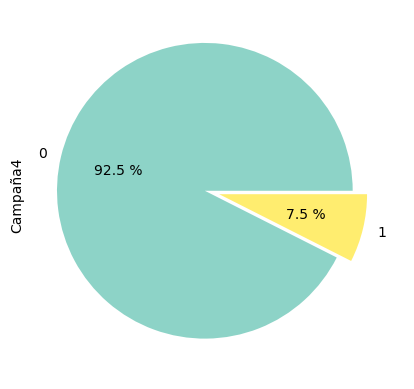

In [75]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña4'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

Text(0, 0.5, 'Frecuencia')

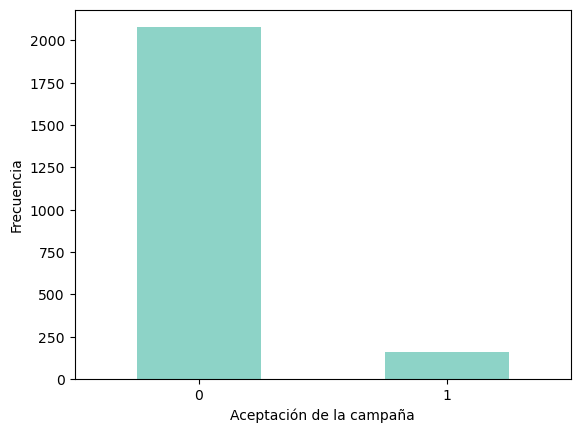

In [76]:
# Representación de aceptación de la campaña 5 
datos4['Campaña5'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Aceptación de la campaña')
plt.ylabel('Frecuencia')

<AxesSubplot:ylabel='Campaña5'>

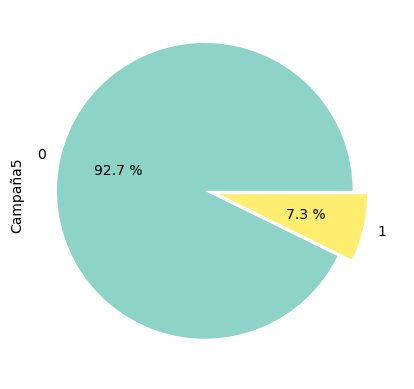

In [77]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0)
datos4['Campaña5'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

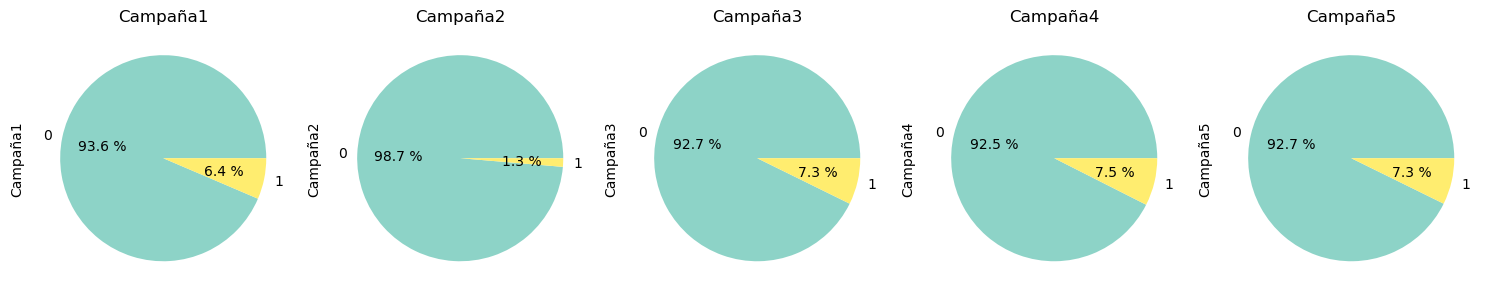

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Escogemos las columnas de las campañas
columnas = ['Campaña1', 'Campaña2', 'Campaña3', 'Campaña4', 'Campaña5']

# Crear los subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

# Generar las gráficas en bucle
for i, columna in enumerate(columnas):
    datos4[columna].value_counts().plot.pie(
        rot=0, cmap='Set3', autopct="%0.1f %%", ax=axs[i])
    axs[i].set_title(columna)

# Ajustar los espacios 
plt.tight_layout()
plt.show()


#### Análisis tipos de compras

In [79]:
# Comprobación de los valores únicos que hay de las cantidades de compras con descuentos
datos4['Comprasdescuentos'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11],
      dtype=int64)

Text(0, 0.5, 'Frecuencia')

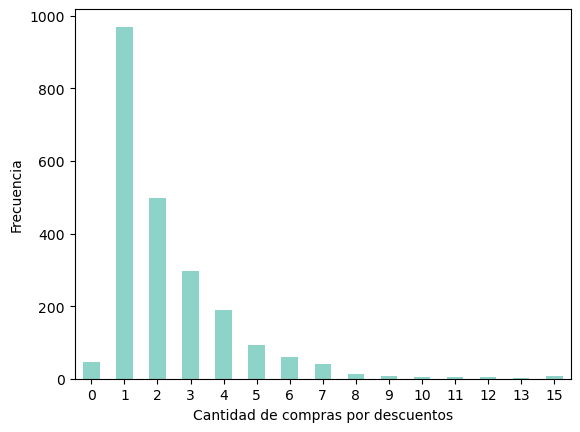

In [80]:
# Representación gráfica de las cantidades de compras con descuentos que se realizan  y su frecuencia
datos4['Comprasdescuentos'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras por descuentos')
plt.ylabel('Frecuencia')

In [81]:
# Comprobación de los valores únicos que hay de las cantidades de compras en web
datos4['Comprasweb'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

Text(0, 0.5, 'Frecuencia')

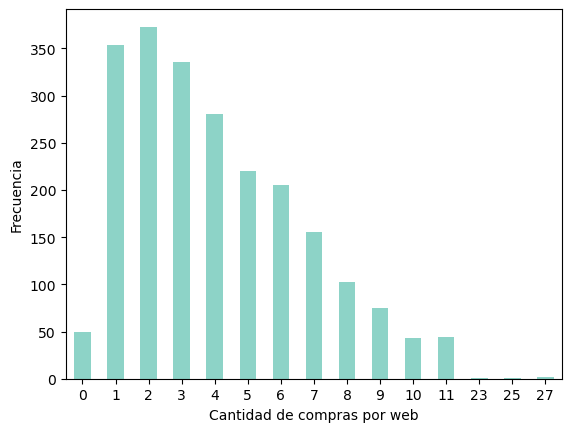

In [82]:
# Representación gráfica de las cantidades de compras por web que se realizan y su frecuencia
datos4['Comprasweb'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras por web')
plt.ylabel('Frecuencia')

In [83]:
# Comprobación de los valores únicos que hay de las cantidades de compras en catálogo
datos4['Comprascatalogo'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

Text(0, 0.5, 'Frecuencia')

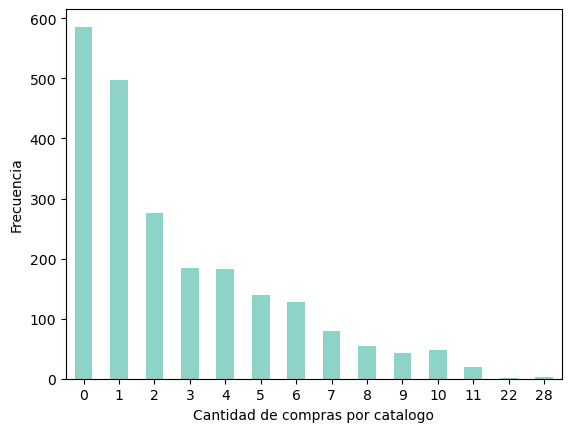

In [84]:
# Representación gráfica de las cantidades de compras por catálogo que se realizan y su frecuencia
datos4['Comprascatalogo'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras por catalogo')
plt.ylabel('Frecuencia')

In [85]:
# Comprobación de los valores únicos que hay de las cantidades de compras en tienda
datos4['Comprastiendas'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

Text(0, 0.5, 'Frecuencia')

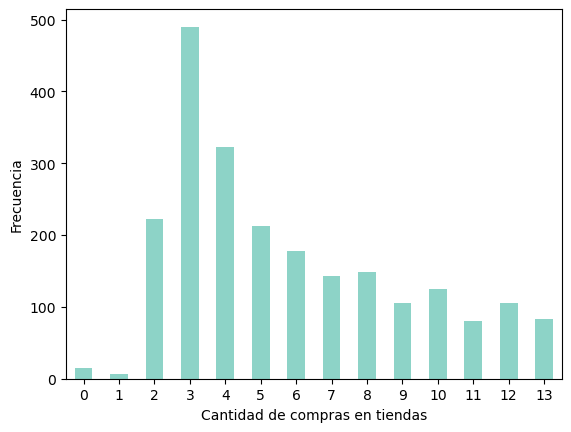

In [86]:
# Representación gráfica de las cantidades de compras en tienda que se realizan y su frecuencia
datos4['Comprastiendas'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de compras en tiendas')
plt.ylabel('Frecuencia')

In [87]:
# Comprobación de los valores únicos que hay devisitas a la web
datos4['Visitaswebmes'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

Text(0, 0.5, 'Frecuencia')

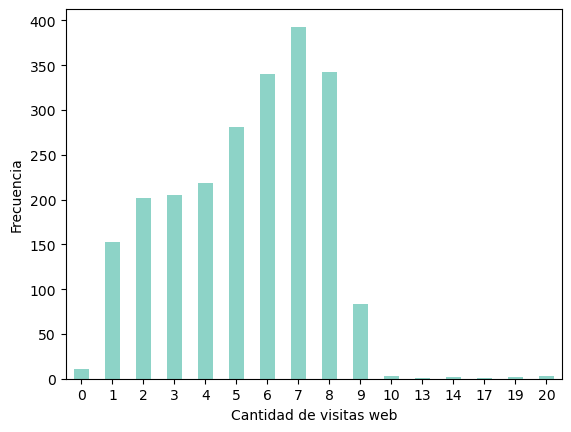

In [88]:
# Representación gráfica de las cantidades de visitas a la web y su frecuencia
datos4['Visitaswebmes'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Cantidad de visitas web')
plt.ylabel('Frecuencia')

## ANÁLISIS ESTADÍSTICO DE LAS VARIABLES CATEGÓRICAS

In [89]:
# Descripción estadística de las variables categóricas
datos4[['Educacion','Estadocivil','Pais']].describe()

,Educacion,Estadocivil,Pais
count,2240,2240,2240
unique,4,5,8
top,Graduado,Casado,SP
freq,1127,864,1095


#### Variable educación con distintas variables

In [90]:
# Agrupar por variables cualitativas y calcular la media de ingresos
datos4.groupby(['Educacion'])['Ingresos'].mean()


Educacion
Basico      20306.259259
Graduado    52170.574992
Master      51063.727768
PhD         56105.210405
Name: Ingresos, dtype: float64

In [91]:
# ordenado descendente
educacion=datos4.groupby(['Educacion'])['Respuesta'].mean()
educacion.sort_values(ascending=False)

Educacion
PhD         0.207819
Master      0.137871
Graduado    0.134871
Basico      0.037037
Name: Respuesta, dtype: float64

In [92]:
datos4.groupby(['Niños'])['Educacion'].apply(lambda x: x.mode())

Niños   
0      0    Graduado
1      0    Graduado
2      0    Graduado
Name: Educacion, dtype: object

In [93]:
# ordenado descendente
educacion=datos4.groupby(['Educacion'])['Niños'].mean()
educacion.sort_values(ascending=False)

Educacion
Basico      0.629630
Master      0.462478
Graduado    0.444543
PhD         0.401235
Name: Niños, dtype: float64

In [94]:
datos4.groupby(['Adolescentes'])['Educacion'].apply(lambda x: x.mode())

Adolescentes   
0             0    Graduado
1             0    Graduado
2             0    Graduado
Name: Educacion, dtype: object

In [95]:
# ordenado descendente
educacion=datos4.groupby(['Educacion'])['Adolescentes'].mean()
educacion.sort_values(ascending=False)

Educacion
PhD         0.598765
Graduado    0.494232
Master      0.490401
Basico      0.092593
Name: Adolescentes, dtype: float64

#### Estado civil con distintas variables

In [96]:
# Agrupar por variables cualitativas y calcular la media de ingresos
#ordenado descendente
civil2= datos4.groupby(['Estadocivil'])['Ingresos'].mean()
civil2.sort_values(ascending=False)

Estadocivil
Viudo            56426.561706
Divorciado       52834.228448
Parejadehecho    52174.143122
Casado           51729.210370
Soltero          51051.329080
Name: Ingresos, dtype: float64

In [97]:
# Agrupar por variables cualitativas y calcular la media de respuesta
civil=datos4.groupby(['Estadocivil'])['Respuesta'].mean()
civil.sort_values(ascending=False)

Estadocivil
Viudo            0.246753
Soltero          0.223819
Divorciado       0.206897
Casado           0.113426
Parejadehecho    0.103448
Name: Respuesta, dtype: float64

In [98]:
# ordenado descendente
educacion=datos4.groupby(['Estadocivil'])['Niños'].mean()
educacion.sort_values(ascending=False)

Estadocivil
Soltero          0.464066
Casado           0.456019
Parejadehecho    0.450000
Divorciado       0.413793
Viudo            0.233766
Name: Niños, dtype: float64

In [99]:
datos4.groupby(['Niños'])['Estadocivil'].apply(lambda x: x.mode())

Niños   
0      0    Casado
1      0    Casado
2      0    Casado
Name: Estadocivil, dtype: object

In [100]:
# ordenado descendente
educacion=datos4.groupby(['Estadocivil'])['Adolescentes'].mean()
educacion.sort_values(ascending=False)

Estadocivil
Viudo            0.636364
Divorciado       0.590517
Parejadehecho    0.529310
Casado           0.511574
Soltero          0.408624
Name: Adolescentes, dtype: float64

In [101]:
datos4.groupby(['Adolescentes'])['Estadocivil'].apply(lambda x: x.mode())

Adolescentes   
0             0    Casado
1             0    Casado
2             0    Casado
Name: Estadocivil, dtype: object

#### País con distintas variables

In [102]:
# Agrupar por variables cualitativas y calcular la moda de respuesta
datos4.groupby(['Pais'])['Respuesta'].apply(lambda x: x.mode())


Pais   
AUS   0    0
CA    0    0
GER   0    0
IND   0    0
ME    0    1
SA    0    0
SP    0    0
US    0    0
Name: Respuesta, dtype: int64

In [103]:
# Agrupar por variables cualitativas y calcular la media de respuesta
pais= datos4.groupby(['Pais'])['Respuesta'].mean()
pais.sort_values(ascending=False)

Pais
ME     0.666667
SP     0.160731
SA     0.154303
AUS    0.143750
CA     0.141791
GER    0.141667
US     0.119266
IND    0.087838
Name: Respuesta, dtype: float64

In [104]:
# Agrupar por variables cualitativas y calcular la media de ingresos
pais= datos4.groupby(['Pais'])['Ingresos'].mean()
pais.sort_values(ascending=False)

Pais
ME     57680.333333
US     53200.555071
CA     53044.621279
SA     53007.614989
GER    52927.633378
AUS    51840.276672
SP     51565.824203
IND    49038.244942
Name: Ingresos, dtype: float64

In [105]:
datos4.groupby(['Adolescentes'])['Pais'].apply(lambda x: x.mode())

Adolescentes   
0             0    SP
1             0    SP
2             0    SP
Name: Pais, dtype: object

In [106]:
# ordenado descendente
educacion=datos4.groupby(['Pais'])['Adolescentes'].mean()
educacion.sort_values(ascending=False)

Pais
ME     0.666667
CA     0.555970
AUS    0.518750
US     0.513761
SP     0.507763
IND    0.493243
SA     0.477745
GER    0.450000
Name: Adolescentes, dtype: float64

In [107]:
datos4.groupby(['Niños'])['Pais'].apply(lambda x: x.mode())

Niños   
0      0    SP
1      0    SP
2      0    SP
Name: Pais, dtype: object

In [108]:
educacion=datos4.groupby(['Pais'])['Niños'].mean()
educacion.sort_values(ascending=False)

Pais
IND    0.520270
AUS    0.518750
SA     0.486647
SP     0.426484
CA     0.417910
US     0.403670
GER    0.400000
ME     0.000000
Name: Niños, dtype: float64

#### Años con otras variables

In [109]:
# Agrupar por variables cualitativas y calcular la media de respuesta
años= datos4.groupby(['años'])['Respuesta'].mean()
años.sort_values(ascending=False)

años
16    1.000000
17    0.500000
70    0.444444
28    0.342857
18    0.333333
30    0.320000
66    0.285714
64    0.250000
19    0.250000
22    0.230769
23    0.227273
68    0.222222
57    0.211538
26    0.205882
32    0.204545
42    0.202247
29    0.190476
60    0.187500
40    0.173913
43    0.169014
63    0.166667
69    0.166667
27    0.162791
47    0.160000
36    0.158730
39    0.157895
33    0.157895
52    0.155556
55    0.152542
20    0.142857
46    0.142857
54    0.137255
35    0.134328
51    0.133333
41    0.131868
50    0.130435
44    0.126761
38    0.125000
37    0.121951
58    0.117647
56    0.113636
31    0.111111
25    0.111111
48    0.098361
59    0.097561
49    0.096154
45    0.094340
61    0.083333
62    0.080000
21    0.076923
65    0.055556
53    0.055556
34    0.035088
67    0.000000
24    0.000000
71    0.000000
72    0.000000
73    0.000000
Name: Respuesta, dtype: float64

In [110]:
datos4['años'].sort_values(ascending=False)

1950    73
424     72
415     71
358     70
2084    70
        ..
1170    18
914     18
2213    17
1850    17
46      16
Name: años, Length: 2240, dtype: int64

In [111]:
#Agrupar por variables cualitativas y calcular la media de ingresos
años= datos4.groupby(['años'])['Ingresos'].mean()
años.sort_values(ascending=False)

años
72    93027.000000
17    81937.000000
71    75865.000000
66    68562.095238
69    67986.833333
68    66899.222222
20    65593.000000
18    63545.000000
70    63006.250150
67    62051.583333
52    61926.627808
56    61897.886364
60    61267.500000
64    59496.843750
65    59302.555556
22    58952.692308
51    58890.555556
58    58584.181399
62    56562.480000
55    56475.546633
54    56311.656916
59    55141.981740
61    55086.000000
19    55013.750000
48    54019.836066
49    53628.807692
45    53296.301887
63    52779.541712
50    52544.358755
57    52007.177911
46    51766.918367
41    51666.934066
47    51343.260000
73    51141.000000
42    50902.792165
44    50822.778188
30    50686.585027
37    50578.207317
36    50559.591291
40    49490.887701
43    48621.387362
39    48487.899147
33    48423.236842
53    48110.444444
38    48015.579545
27    47937.284915
35    47862.791045
31    47582.894475
25    46783.962963
34    46289.004410
21    45378.538462
23    44107.454545
29    4

In [112]:
ordenar= datos4.groupby(['años'])['Ingresos'].apply(lambda x: x.mode())
ordenar.sort_values(ascending=False)

años   
69    5    113734.0
54    5     98777.0
18    2     95529.0
60    2     94384.0
72    0     93027.0
             ...   
36    0      7500.0
34    0      7500.0
27    0      7500.0
20    0      7500.0
16    0      7500.0
Name: Ingresos, Length: 250, dtype: float64

#### ANÁLISIS DE LAS VARIABLES

Text(0, 0.5, 'Frecuencia ')

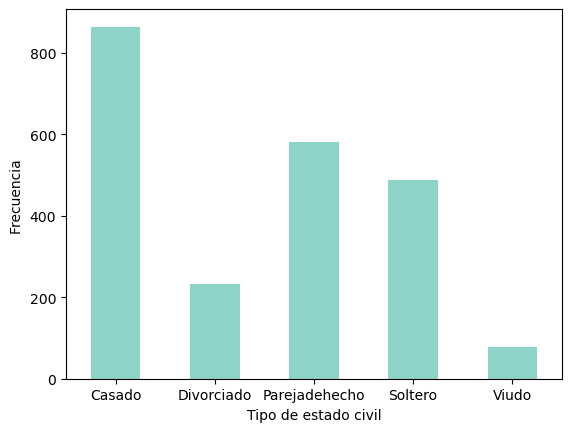

In [113]:
# Representación en barras de la frecuencia de las instancias de la variable estado civil
datos4['Estadocivil'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Tipo de estado civil')
plt.ylabel('Frecuencia ')

<AxesSubplot:ylabel='Estadocivil'>

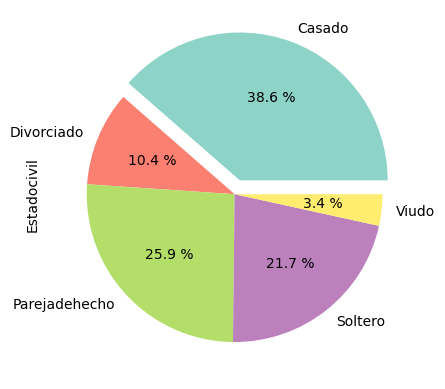

In [114]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0.1, 0, 0, 0, 0)
datos4['Estadocivil'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

Text(0, 0.5, 'Frecuencia ')

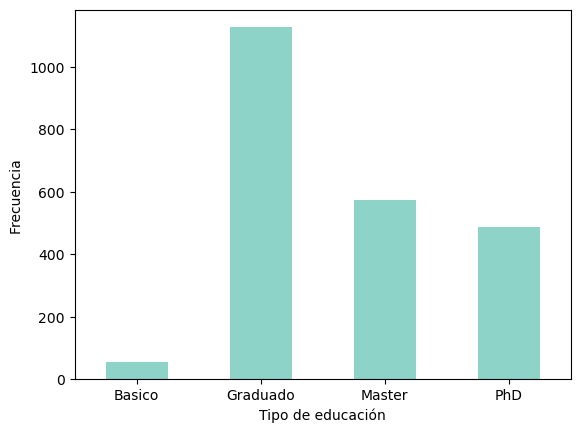

In [115]:
# Representación en barras de la frecuencia de las instancias de la variable educación
datos4['Educacion'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Tipo de educación')
plt.ylabel('Frecuencia ')

<AxesSubplot:ylabel='Educacion'>

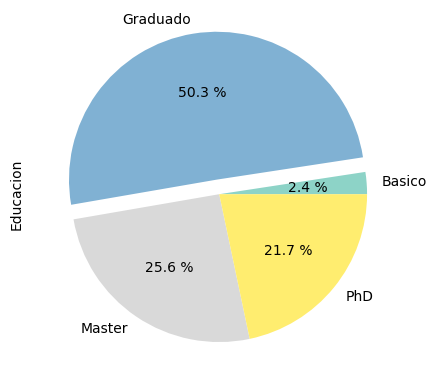

In [116]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0, 0.1, 0, 0)
datos4['Educacion'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)


Text(0, 0.5, 'Frecuencia ')

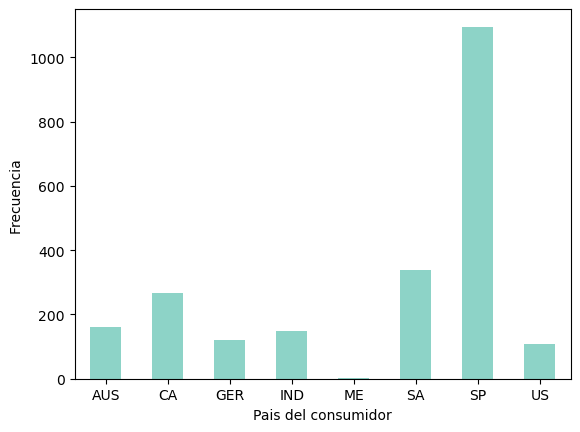

In [117]:
# Representación en barras de la frecuencia de las instancias de la variable pais
datos4['Pais'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Pais del consumidor')
plt.ylabel('Frecuencia ')

<AxesSubplot:ylabel='Pais'>

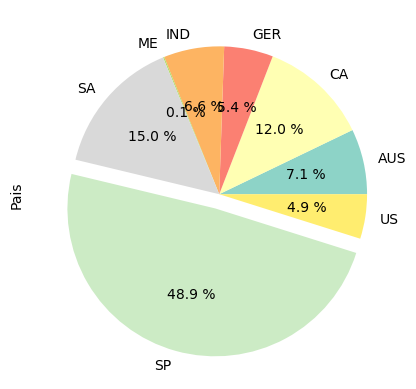

In [118]:
# Igual que el anterior pero en porcentaje y en gráfico circular
desfase = (0, 0, 0, 0,0,0,0.1,0)
datos4['Pais'].value_counts(sort=False).sort_index().plot.pie(rot=0, cmap='Set3', autopct="%0.1f %%", explode=desfase)

#### ANÁLISIS CORRELACIÓN

In [119]:
# Creación de la matriz de correlación de todas las variables
correlacion=datos4.corr()
datos4.corr()

,Identificador,Cumpleaños,Ingresos,Niños,Adolescentes,Ultimacompra,Totalvinos,Totalfrutas,Totalcarnes,Totalpescados,...,Campaña1,Campaña2,Quejas,Zcostecontacto,Zingresos,Respuesta,añocompra,años,Totalgasto,Totalhijos
Identificador,1.000000,0.003024,0.000086,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968,-0.006414,-0.003389,-0.018054,-0.000146
Cumpleaños,0.003024,1.000000,-0.198733,0.234004,-0.363147,-0.019651,-0.162916,-0.013715,-0.030897,-0.042499,...,-0.008229,-0.007658,-0.004334,NaN,NaN,0.018417,-0.024984,-0.998297,-0.113710,-0.095451
Ingresos,0.000086,-0.198733,1.000000,-0.510551,0.034163,0.006941,0.685887,0.505459,0.684299,0.518656,...,0.324927,0.103884,-0.030595,NaN,NaN,0.160647,0.026687,0.199663,0.789064,-0.340882
Niños,0.002406,0.234004,-0.510551,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008,0.053339,-0.230151,-0.556669,0.689971
Adolescentes,-0.002580,-0.363147,0.034163,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446,-0.008260,0.361517,-0.138384,0.698433
Ultimacompra,-0.046524,-0.019651,0.006941,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437,-0.026084,0.018067,0.020433,0.018053
Totalvinos,-0.022878,-0.162916,0.685887,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.354133,0.205907,-0.039007,NaN,NaN,0.247254,-0.154188,0.153404,0.891839,-0.351909
Totalfrutas,0.004600,-0.013715,0.505459,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289,-0.055150,0.010453,0.614229,-0.394853
Totalcarnes,-0.004437,-0.030897,0.684299,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.309761,0.043033,-0.023483,NaN,NaN,0.236335,-0.082472,0.025987,0.842965,-0.502208
Totalpescados,-0.024475,-0.042499,0.518656,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.260762,0.002577,-0.020953,NaN,NaN,0.111331,-0.067611,0.038419,0.642818,-0.425503


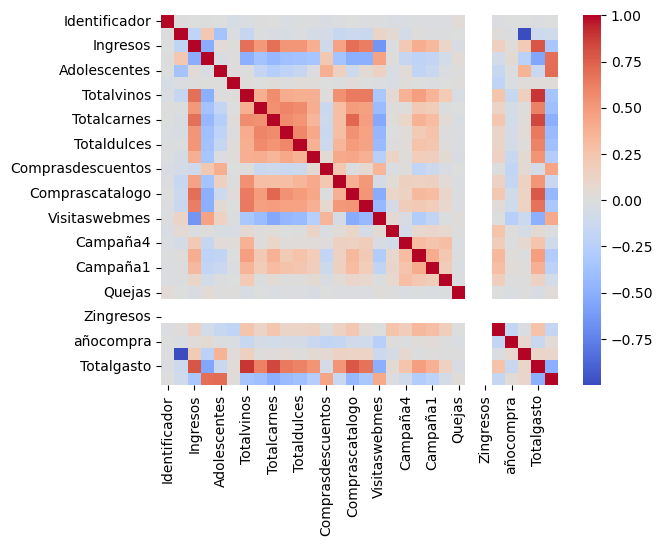

In [120]:
# Representación gráfica de la matriz de correlación
sns.heatmap(correlacion, annot=False, cmap='coolwarm')
plt.show()

In [121]:
#hay dos datos: z_revenue(Zingresos) y z_costcontact(Zcostecontacto), que solo tiene el mismo resultado. 
#No se sabe a que hace referencia. 
datos4['Zingresos']
datos4['Zcostecontacto']

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Zcostecontacto, Length: 2240, dtype: int64

## REALIZACIÓN DE MACHINE LEARNING

Text(0, 0.5, 'Número de respuesta')

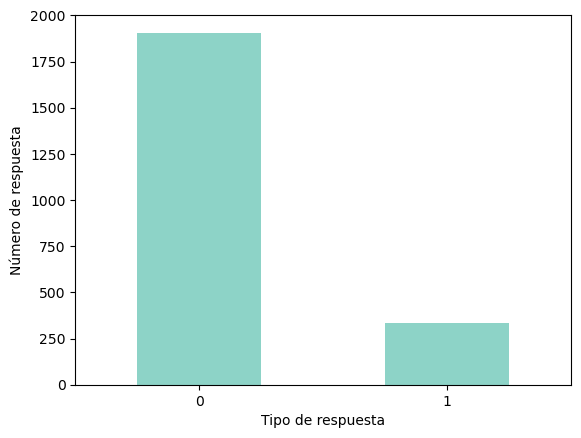

In [122]:
# Análisis de la variable salida para ver si está balanceado o no
datos4['Respuesta'].value_counts(sort=False).sort_index().plot.bar(rot=0, cmap='Set3')
plt.xlabel('Tipo de respuesta')
plt.ylabel('Número de respuesta')

In [123]:
# Apertura del archivo del conjunto de datos ya limpiado
datos5= pd.read_csv("ARCHIVOTRATADO.csv", sep=";")

In [124]:
# Codificar las variables categóricas con la técnica one-hot para volverlas dummies
data = pd.get_dummies(datos5, columns=['Educacion','Estadocivil','Pais', 'Inscripcion'])

# Separar las variables predictoras y la variable objetivo
X = data.drop('Respuesta', axis=1)
y = data['Respuesta']

# Aplicar la técnica SMOTE para balancear las clases
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

#Para saber como está estratificada
print("Tamaño del conjunto x_train :", X_train.shape)
print("Tamaño del conjunto y_train :", y_train.shape)
print("Tamaño del conjunto x_test :", X_test.shape)
print("Tamaño del conjunto y_test :", y_test.shape)



Tamaño del conjunto x_train : (2859, 706)
Tamaño del conjunto y_train : (2859,)
Tamaño del conjunto x_test : (953, 706)
Tamaño del conjunto y_test : (953,)


## ARBOL DE DECISIÓN

(Clasificación: si el objetivo es predecir si un cliente realizará una compra o no, se puede aplicar un algoritmo de clasificación, como árboles de decisión, regresión logística o SVM.
Agrupamiento: si se desea identificar patrones en los datos sin tener una variable objetivo definida, se puede aplicar un algoritmo de agrupamiento, como k-means o clustering jerárquico.)

In [125]:
#Creamos primero la estructura del árbol 
#y la entrenamos con los conjuntos de entrenamiento de las variables predictoras y la respuesta.

arb = tree.DecisionTreeClassifier()
arbol = arb.fit(X_train, y_train)

#### Matriz de Confusión

In [126]:
#Realizamos la predicción
y_pred = arbol.predict(X_test)

# Evaluamos el modelo
print("% de acierto en el conjunto de entrenamiento: ", arbol.score(X_train, y_train))
print("% de acierto en el conjunto de test: ", arbol.score(X_test, y_test))

#Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Precisión sin poda:", accuracy)

% de acierto en el conjunto de entrenamiento:  1.0
% de acierto en el conjunto de test:  0.8499475341028332
Precisión sin poda: 0.8499475341028332


In [127]:
# creación de la matriz de confusión
metrics.confusion_matrix(y_test, y_pred)

array([[393,  86],
       [ 57, 417]], dtype=int64)

In [128]:
# Cálculo de todas las métricas
classReport = metrics.classification_report(y_test, y_pred)
print(classReport)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       479
           1       0.83      0.88      0.85       474

    accuracy                           0.85       953
   macro avg       0.85      0.85      0.85       953
weighted avg       0.85      0.85      0.85       953



#### AUC

In [129]:
print(f'AUC del modelo Árbol: {roc_auc_score(y_test, y_pred)}')
#En la práctica, un valor de AUC de alrededor de 0.7 a 0.8 se considera aceptable en muchos problemas, 
#mientras que un valor superior a 0.9 se considera excelente. Sin embargo, el valor óptimo de AUC puede variar dependiendo 
#del contexto del problema y de las implicaciones prácticas de la clasificación incorrecta de las instancias.

AUC del modelo Árbol: 0.8501030628154648


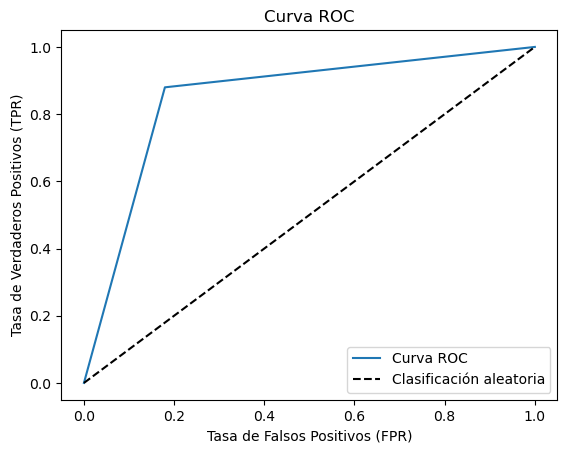

In [130]:
# Para la creación de la curva roc de forma gráfica
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [131]:
# Inicio del código para la creación del árbol de decisión de forma gráfica
import os

# Obtener el valor actual de la variable de entorno PATH
current_path = os.environ.get('PATH', '')

# Agregar la ruta de Graphviz al PATH
graphviz_path = r'C:\Program Files\Graphviz\bin'
new_path = f'{current_path};{graphviz_path}'

# Actualización de la variable de entorno PATH
os.environ['PATH'] = new_path

In [132]:
# Código en sí de la creación del árbol de decisión

# Obtener los nombres de las características y las clases
feature_names = data.columns[:-1].tolist()  # Para obtener los nombres de las características (excepto la última)
target_names = data.iloc[:, -1].astype(str).unique().tolist() 

# Crear la representación del árbol de decisión en formato DOT
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)

# Generar el gráfico del árbol de decisión usando la libreria Graphviz
graph = graphviz.Source(dot_data)
graph.render("mkt_decision_tree")  #para guardarlo

# Visualizar el gráfico
graph.view()

'mkt_decision_tree.pdf'

#### Poda con cross validation

In [133]:
#Comprobación del accuracy del modelo por si al realizar una técnica de poda arroja un mejor modelo que sin ella

#primero creamos la estructura del arbol
arb2 = tree.DecisionTreeClassifier()

# Realizar la poda de Cross Validation
scores = cross_val_score(arb2, X, y, cv=5)  # cv indica el número de divisiones en Cross Validation

# Imprimir los puntajes de precisión de cada división
print("Precisión por división:", scores)

# Ajustar el modelo utilizando los datos de entrenamiento
arbol2 = arb2.fit(X_train, y_train)
#Realizamos la predicción
y_pred = arbol2.predict(X_test)

# Evaluamos el modelo
print("% de acierto en el conjunto de entrenamiento: ", arbol2.score(X_train, y_train))
print("% de acierto en el conjunto de test: ", arbol2.score(X_test, y_test))

#Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Precisión con poda:", accuracy)

Precisión por división: [0.84375    0.85044643 0.82589286 0.83705357 0.171875  ]
% de acierto en el conjunto de entrenamiento:  1.0
% de acierto en el conjunto de test:  0.8415529905561385
Precisión con poda: 0.8415529905561385


In [134]:
# creación de la matriz de confusión
metrics.confusion_matrix(y_test, y_pred)

array([[388,  91],
       [ 60, 414]], dtype=int64)

In [135]:
# Cálculo de todas las métricas
classReport = metrics.classification_report(y_test, y_pred)
print(classReport)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       479
           1       0.82      0.87      0.85       474

    accuracy                           0.84       953
   macro avg       0.84      0.84      0.84       953
weighted avg       0.84      0.84      0.84       953



In [136]:
print(f'AUC del modelo Árbol: {roc_auc_score(y_test, y_pred)}')
#En la práctica, un valor de AUC de alrededor de 0.7 a 0.8 se considera aceptable en muchos problemas, 
#mientras que un valor superior a 0.9 se considera excelente. Sin embargo, el valor óptimo de AUC puede variar dependiendo 
#del contexto del problema y de las implicaciones prácticas de la clasificación incorrecta de las instancias.

AUC del modelo Árbol: 0.8417192991728548


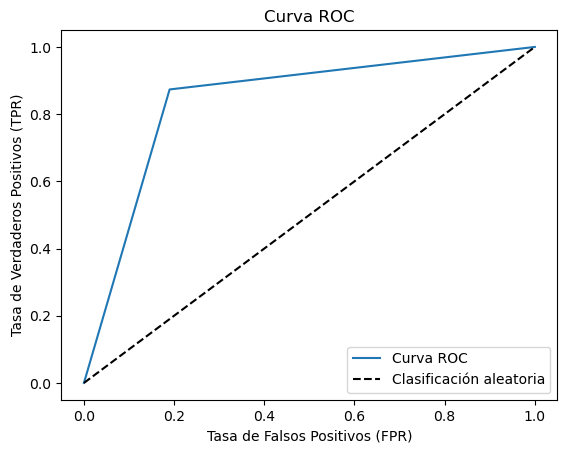

In [137]:
# Creación de la gráfica curva roc para un arbol podado
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [138]:
# Creación del arbol de decisión y sus pasos para guardarlo

# Obtemer los nombres de las características y las clases
feature_names = data.columns[:-1].tolist()  # Obtener los nombres de las características (excepto la última)
target_names = data.iloc[:, -1].astype(str).unique().tolist() 

# Crear la representación del árbol de decisión en formato DOT
dot_data = tree.export_graphviz(arbol2, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)

# Generar el gráfico del árbol de decisión usando Graphviz
graph = graphviz.Source(dot_data)
graph.render("mkt_decision_tree_crossvalidation")  # Guardado del árbol

# Visualizar el gráfico 
graph.view()

'mkt_decision_tree_crossvalidation.pdf'

#### KNN

In [139]:
#Creación de un knn por el simple hecho de comprobar que modelo daba un mejor ajuste
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

C:\Users\Lucia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Precisión del modelo: 0.7964323189926548


In [140]:
# Comprobación de todas las métricas
classReport2 = metrics.classification_report(y_test, y_pred)
print(classReport2)

              precision    recall  f1-score   support

           0       0.91      0.66      0.77       479
           1       0.73      0.93      0.82       474

    accuracy                           0.80       953
   macro avg       0.82      0.80      0.79       953
weighted avg       0.82      0.80      0.79       953



## CLUSTER

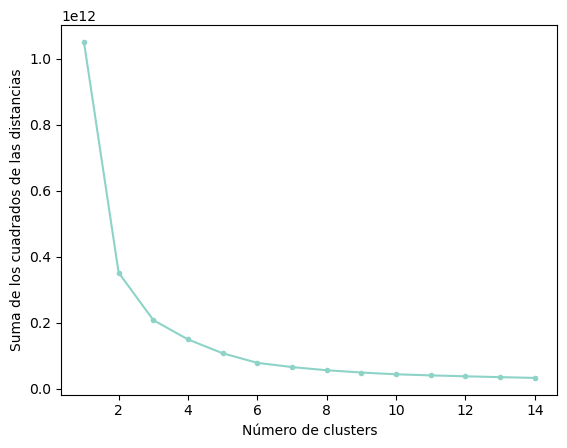

In [141]:
# Método de codo para saber cual es el nñumero óptimo de kmeans a utilizar

# Seleccioanr los datos
datos7 = pd.read_csv("ARCHIVOTRATADO.csv", sep=";")

# Codificar las variables categóricas con la técnica one-hot
data = pd.get_dummies(datos7, columns=['Educacion','Estadocivil','Pais', 'Inscripcion'])

# Seleccionar columnas numéricas relevantes para el análisis
X= data.select_dtypes(include=['int', 'float'])


# Calcular la suma de los cuadrados de las distancias para diferentes valores de k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar la suma de los cuadrados de las distancias en función del número de clusters
hex='#8dd3c7'
plt.plot(range(1, 15), sse, marker='o', color=hex , markersize=3)
plt.xlabel('Número de clusters')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.show()

In [142]:
#estudio de centroides de los cluster para crear los cluster

# Datos de entrada
datos8 = pd.read_csv("ARCHIVOTRATADO.csv", sep=";")
# Codificar las variables categóricas con la técnica one-hot
data = pd.get_dummies(datos8, columns=['Educacion','Estadocivil','Pais', 'Inscripcion'])

# Seleccionar columnas numéricas relevantes para el análisis
X= data.select_dtypes(include=['int', 'float'])

# Crear un objeto KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Entrenar el modelo con los datos de entrada
kmeans.fit(X)

# Imprimir las etiquetas de los clusters para cada ejemplo
print(kmeans.labels_)

# Imprimir las coordenadas de los centroides de los clusters
print(kmeans.cluster_centers_)

[2 2 0 ... 2 0 2]
[[ 1.11298692e+03  5.76322674e+03  1.96753634e+03  7.69498532e+04
   8.57558140e-02  3.50290698e-01  4.90886628e+01  6.16405523e+02
   5.69694767e+01  3.97324128e+02  8.28023256e+01  6.01802326e+01
   7.01162791e+01  1.60901163e+00  5.40261628e+00  5.45203488e+00
   8.40552326e+00  3.15988372e+00  6.83139535e-02  1.35174419e-01
   2.29651163e-01  1.83139535e-01  2.61627907e-02  7.26744186e-03
   3.00000000e+00  1.10000000e+01  2.34011628e-01]
 [ 1.12302838e+03  5.66187162e+03  1.97319730e+03  2.83319365e+04
   8.09459459e-01  3.10810811e-01  4.85621622e+01  3.03256757e+01
   5.99864865e+00  2.55972973e+01  9.08108108e+00  6.06486486e+00
   1.77364865e+01  2.14189189e+00  2.15405405e+00  5.28378378e-01
   3.07972973e+00  6.90810811e+00  8.51351351e-02  4.05405405e-03
   1.66533454e-16  1.35135135e-03 -3.29597460e-17  1.62162162e-02
   3.00000000e+00  1.10000000e+01  1.14864865e-01]
 [ 1.12180296e+03  5.38368596e+03  1.96614409e+03  5.23550398e+04
   4.15024631e-01  8.1

In [143]:
#Saber que tipo de datos son los que resultan del modelo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Columns: 707 entries, Unnamed: 0 to Inscripcion_31-12-2013
dtypes: float64(1), int64(26), uint8(680)
memory usage: 1.9 MB


In [144]:
# comprobar las columnas que hay con las dummies
data.columns

Index(['Unnamed: 0', 'Identificador', 'Cumpleaños', 'Ingresos', 'Niños',
       'Adolescentes', 'Ultimacompra', 'Totalvinos', 'Totalfrutas',
       'Totalcarnes',
       ...
       'Inscripcion_31-03-2014', 'Inscripcion_31-05-2013',
       'Inscripcion_31-05-2014', 'Inscripcion_31-07-2012',
       'Inscripcion_31-07-2013', 'Inscripcion_31-08-2012',
       'Inscripcion_31-08-2013', 'Inscripcion_31-10-2012',
       'Inscripcion_31-12-2012', 'Inscripcion_31-12-2013'],
      dtype='object', length=707)

In [145]:
#comprobación de las columnas sn las dummies
X.columns

Index(['Unnamed: 0', 'Identificador', 'Cumpleaños', 'Ingresos', 'Niños',
       'Adolescentes', 'Ultimacompra', 'Totalvinos', 'Totalfrutas',
       'Totalcarnes', 'Totalpescados', 'Totaldulces', 'Totallujos',
       'Comprasdescuentos', 'Comprasweb', 'Comprascatalogo', 'Comprastiendas',
       'Visitaswebmes', 'Campaña3', 'Campaña4', 'Campaña5', 'Campaña1',
       'Campaña2', 'Quejas', 'Zcostecontacto', 'Zingresos', 'Respuesta'],
      dtype='object')

Text(0.5, 1.0, 'Scatter plot: Ingresos vs Totalvinos')

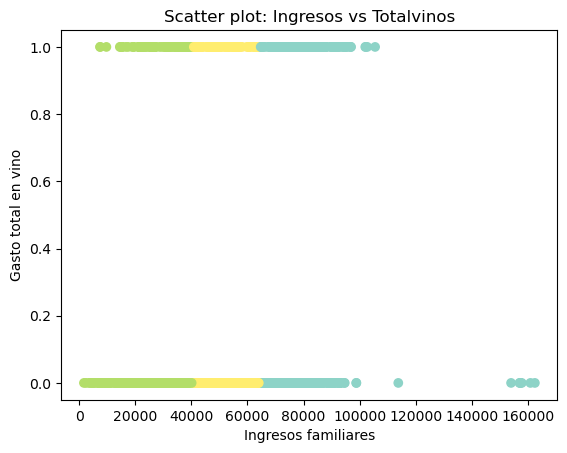

In [146]:
# Gráfico de dispersión de los cluster
# Asignar cada observación al cluster correspondiente
labels = kmeans.predict(X)

# Visualizar clusters en una gráfica de dispersión
plt.scatter(X['Ingresos'], X['Respuesta'], c=labels, cmap='Set3')
plt.xlabel('Ingresos familiares')
plt.ylabel('Gasto total en vino')
plt.title('Scatter plot: Ingresos vs Totalvinos')

In [147]:
# Métrica de silueta para comprobar si el cluster es bueno o no. Se evalua de 0 a 1.

# X es la matriz de características
# labels es una lista o array que contiene las etiquetas de clúster asignadas a cada muestra

silhouette_avg = silhouette_score(X, labels)
print("El índice de silueta promedio es:", silhouette_avg)


El índice de silueta promedio es: 0.4914924038943047


In [148]:
# Indice intracluster para evaluar la distancia de los datos
# X es la matriz de características 
# num_clusters es el número de clústeres a evaluar

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

wcss = kmeans.inertia_
print("La suma de las distancias cuadradas intraclúster es:", wcss)

La suma de las distancias cuadradas intraclúster es: 207701827621.60672


In [149]:
# Indice itnercluster para evaluar la distancia de los datos
# Obtener los centroides de los clústeres
centroids = kmeans.cluster_centers_

# Calcula la distancia euclidiana entre los centroides
distance = np.linalg.norm(centroids[0] - centroids[1])

print("La distancia interclúster es:", distance)

La distancia interclúster es: 48578.08900735398


In [150]:
# Código para sacar los datos de cada variable agrupado por cluster

# Obtener las etiquetas de cluster asignadas a cada muestra
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame
X['cluster_label'] = labels

# Crear un diccionario para almacenar los datos de cada cluster
cluster_data = {}
for label in set(labels):
    cluster_data[label] = X[X['cluster_label'] == label].drop('cluster_label', axis=1)

# Imprimir los datos de cada cluster
for label, cluster in cluster_data.items():
    print("Cluster", label)
    print(cluster)
    print()

Cluster 0
      Unnamed: 0  Identificador  Cumpleaños  Ingresos  Niños  Adolescentes  \
3              3           6182        1984   26646.0      1             0   
7              7           6177        1985   33454.0      1             0   
8              8           4855        1974   30351.0      1             0   
9              9           5899        1950    5648.0      1             1   
11            11            387        1976    7500.0      0             0   
...          ...            ...         ...       ...    ...           ...   
2223        2223           1448        1963   33562.0      1             2   
2229        2229          10084        1972   24434.0      2             0   
2230        2230           7004        1984   11012.0      1             0   
2232        2232           8080        1986   26816.0      0             0   
2234        2234           8372        1974   34421.0      1             0   

      Ultimacompra  Totalvinos  Totalfrutas  Totalcar

In [151]:
# Aqui ya se agrupan por cluster y se pueden evaluar los distintos grupos
clustermedia= X.groupby('cluster_label').mean().T
clustermedia

cluster_label,0,1,2
Unnamed: 0,1122.322148,1111.833819,1123.401731
Identificador,5662.412081,5764.740525,5381.123609
Cumpleaños,1973.185235,1967.530612,1966.119901
Ingresos,28412.817450,76985.695335,52459.441636
Niños,0.808054,0.084548,0.414091
Adolescentes,0.315436,0.351312,0.813350
Ultimacompra,48.659060,49.020408,49.599506
Totalvinos,30.575839,616.419825,290.695921
Totalfrutas,5.969128,56.934402,19.051916
Totalcarnes,25.506040,397.829446,101.427689


In [152]:
# Calcular los valores más frecuentes de las variables categóricas en cada cluster
clustermoda = X.groupby('cluster_label').agg(lambda x: x.value_counts().index[0]).T
clustermoda

cluster_label,0,1,2
Unnamed: 0,3.0,2.0,0.000000
Identificador,6182.0,4141.0,5524.000000
Cumpleaños,1976.0,1970.0,1975.000000
Ingresos,7500.0,83844.0,52247.251354
Niños,1.0,0.0,0.000000
Adolescentes,0.0,0.0,1.000000
Ultimacompra,49.0,54.0,25.000000
Totalvinos,2.0,483.0,14.000000
Totalfrutas,0.0,0.0,0.000000
Totalcarnes,5.0,124.0,11.000000


In [153]:
# saber las variables que hay en los cluster
X.columns

Index(['Unnamed: 0', 'Identificador', 'Cumpleaños', 'Ingresos', 'Niños',
       'Adolescentes', 'Ultimacompra', 'Totalvinos', 'Totalfrutas',
       'Totalcarnes', 'Totalpescados', 'Totaldulces', 'Totallujos',
       'Comprasdescuentos', 'Comprasweb', 'Comprascatalogo', 'Comprastiendas',
       'Visitaswebmes', 'Campaña3', 'Campaña4', 'Campaña5', 'Campaña1',
       'Campaña2', 'Quejas', 'Zcostecontacto', 'Zingresos', 'Respuesta',
       'cluster_label'],
      dtype='object')

In [154]:
#Comprobación de las variables categóricas dentro de los cluster

# Agregar las etiquetas de cluster al conjunto de datos
data['Cluster'] = labels

# Iterar sobre cada cluster y obtener las variables dummy para ese cluster
for cluster in range(3):  
    cluster_data = data[data['Cluster'] == cluster]
    cluster_dummies = cluster_data.filter(like='Pais')  
    
    print(f"Cluster {cluster} - Variables dummy:")
    print(cluster_dummies.head().sum())
    print()

Cluster 0 - Variables dummy:
Pais_AUS    0
Pais_CA     0
Pais_GER    0
Pais_IND    0
Pais_ME     0
Pais_SA     0
Pais_SP     0
Pais_US     5
dtype: int64

Cluster 1 - Variables dummy:
Pais_AUS    1
Pais_CA     0
Pais_GER    0
Pais_IND    0
Pais_ME     0
Pais_SA     0
Pais_SP     0
Pais_US     4
dtype: int64

Cluster 2 - Variables dummy:
Pais_AUS    0
Pais_CA     0
Pais_GER    0
Pais_IND    0
Pais_ME     0
Pais_SA     0
Pais_SP     0
Pais_US     5
dtype: int64



In [155]:
#Comprobación de las variables categóricas dentro de los cluster

# Agregar las etiquetas de cluster al conjunto de datos
data['Cluster'] = labels

# Iterar sobre cada cluster y obtener las variables dummy para ese cluster
for cluster in range(3): 
    cluster_data = data[data['Cluster'] == cluster]
    cluster_dummies = cluster_data.filter(like='Educacion')  
    
    print(f"Cluster {cluster} - Variables dummy:")
    print(cluster_dummies.head().sum())
    print()

Cluster 0 - Variables dummy:
Educacion_Basico      1
Educacion_Graduado    1
Educacion_Master      0
Educacion_PhD         3
dtype: int64

Cluster 1 - Variables dummy:
Educacion_Basico      0
Educacion_Graduado    1
Educacion_Master      1
Educacion_PhD         3
dtype: int64

Cluster 2 - Variables dummy:
Educacion_Basico      0
Educacion_Graduado    3
Educacion_Master      1
Educacion_PhD         1
dtype: int64



In [156]:
#Comprobación de las variables categóricas dentro de los cluster

# Agregar las etiquetas de cluster al conjunto de datos
data['Cluster'] = labels

# Iterar sobre cada cluster y obtener las variables dummy para ese cluster
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    cluster_dummies = cluster_data.filter(like='Estadocivil')  
    
    print(f"Cluster {cluster} - Variables dummy:")
    print(cluster_dummies.head().sum())
    print()

Cluster 0 - Variables dummy:
Estadocivil_Casado           2
Estadocivil_Divorciado       0
Estadocivil_Parejadehecho    3
Estadocivil_Soltero          0
Estadocivil_Viudo            0
dtype: int64

Cluster 1 - Variables dummy:
Estadocivil_Casado           3
Estadocivil_Divorciado       0
Estadocivil_Parejadehecho    1
Estadocivil_Soltero          1
Estadocivil_Viudo            0
dtype: int64

Cluster 2 - Variables dummy:
Estadocivil_Casado           1
Estadocivil_Divorciado       1
Estadocivil_Parejadehecho    1
Estadocivil_Soltero          2
Estadocivil_Viudo            0
dtype: int64



#### Gráficas de dispersión sin cluster

In [ ]:
# Bucle para que python itere cada variable con otra para crear los gráficos de dispersión y no ir haciendolo poco a poco

import os
# Obtener la lista de nombres de columnas del DataFrame
columnas = datos7.columns

# Crear un directorio para guardar las imágenes
directorio = 'C:\\Users\\Lucia'  
os.makedirs(directorio, exist_ok=True)

# Generar scatter plots para cada variable y guardar las imágenes
for columna_x in columnas:
       for columna_y in columnas:
        # Excluir la variable si es la misma en el eje x e y
        if columna_x != columna_y:
            hex='#8dd3c7'
            plt.scatter(datos7[columna_x], datos7[columna_y], color=hex)
            plt.title('Scatter plot: {} vs {}'.format(columna_x, columna_y))
            plt.xlabel(columna_x)
            plt.ylabel(columna_y)
            
            # Guardar la imagen en un archivo en el directorio especificado
            ruta_imagen = os.path.join(directorio, 'scatter_{}_vs_{}.png'.format(columna_x, columna_y))
            plt.savefig(ruta_imagen)
            
            # Limpiar el gráfico para la siguiente iteración
            plt.clf()

# Notificar la finalización del proceso
print('Imágenes guardadas')

